In [2]:
import csv
import re
import itertools
import nltk
import fasttext
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dic_contractions = {"ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "id":"i would",
        "i'll":"i will",
        "i'm":"i am",
        "i'm'a":"i am about to",
        "i'm'o":"i am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "i've":"i have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [4]:
def trans_eng(text):
    translator = Translator()
    translation  = translator.translate(text)
    return translation.text

In [5]:
def tweet_cleaning(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)   
    text = emoji_pattern.sub(r'', text)    # Remove emoji
    text = text.replace('RT','') #Remove RT 
    text = ' '.join(re.sub("(\w+:\/\/\S+)|http\S+", " ", text).split()) # Remove URL
    text = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\*]", " ", text).split()) #Remove punctuations            
    #text = trans_eng(text) # <Google Translation API has a limit>
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", text).split()) # Remove mentions, hashtags      
    text = text.lower() #Convert all of the characters into lower
    
    ## Replace contractions   [Don't --> Do not]    
    text = text.replace("’","'")
    words = text.split()
    reformed = [dic_contractions[word] if word in dic_contractions else word for word in words]
    text = " ".join(reformed)    
    
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))#Remove repeating characters ;each character should occur not more than 2 times

    return(text)

In [4]:
train_data = pd.read_csv('Dataset/Train/betsentiment-EN-tweets-sentiment-teams.csv',encoding = 'latin1')

In [5]:
train_data.head()

tweet_date_created             tweet_id  \
0         2018-05-08T08:19:09   993767246437666816   
1  2018-07-02T19:28:00.331000  1013866900772835331   
2  2018-09-05T12:54:20.408000  1037323043360657408   
3         2018-05-08T10:42:17   993803266323550208   
4  2018-08-07T07:29:59.136000  1026732168226267136   

                                          tweet_text language sentiment  \
0  Bayer Leverkusen goalkeeper Bernd Leno will no...       en   NEUTRAL   
1  Gary Speed v Blackburn at St James in 2001/02 ...       en   NEUTRAL   
2  @ChelseaFC Don't make him regret it and start ...       en   NEUTRAL   
3  @LiverpoolFF @AnfieldEdition He's a liar, made...       en  NEGATIVE   
4  @theesk @Everton Didn't realise Kenwright is d...       en   NEUTRAL   

                                     sentiment_score  
0  {"Neutral":0.7228581905364990234375,"Negative"...  
1  {"Neutral":0.998256266117095947265625,"Negativ...  
2  {"Neutral":0.912796199321746826171875,"Negativ...  
3  {"Neutral":0.3271420896053314208984375,"Negati...  
4  {"Neutral":0.957906246185302734375,"Negative":...

In [6]:
validation_data = pd.read_csv('Dataset/Validate/betsentiment-EN-tweets-sentiment-players.csv',encoding = 'latin1')
validation_data.head()

tweet_date_created             tweet_id  \
0  2018-06-30T19:26:39.099000  1013141786745860099   
1  2018-08-12T14:23:19.240000  1028648126809354240   
2  2018-07-17T10:50:10.393000  1019172399735099393   
3         2018-06-08T15:20:06  1005107207652831233   
4  2018-07-28T17:25:29.664000  1023258152110833664   

                                          tweet_text language sentiment  \
0  I vote @BernardoCSilva for @Budweiser #Manofth...       en   NEUTRAL   
1  When is your first match? Didn't see you today...       en   NEUTRAL   
2  @Cristiano You never know what you had till it...       en   NEUTRAL   
3  @youngy18 @England You look good man I'd appre...       en  POSITIVE   
4  @LFC @officialAL20 @IntChampionsCup @ManUtd Ex...       en   NEUTRAL   

                                     sentiment_score  
0  {"Neutral":0.795609652996063232421875,"Negativ...  
1  {"Neutral":0.97318065166473388671875,"Negative...  
2  {"Neutral":0.9692952632904052734375,"Negative"...  
3  {"Neutral":0.257103621959686279296875,"Negativ...  
4  {"Neutral":0.584071457386016845703125,"Negativ...

In [4]:
#DATA PROCESSING  FOR TRAINING & VALIDATION
def transform_instance(row):
    cur_row = []
    #Prefix the index-ed label with __label__
    label = "__label__" + row[4]  
    cur_row.append(label)
    cur_row.extend(nltk.word_tokenize(tweet_cleaning(row[2].lower())))
    return cur_row


def preprocess(input_file, output_file, keep=1):
    count_pos_neu_neg = [0,0,0]
    i=0
    with open(output_file, 'w', encoding='utf-8-sig') as csvoutfile:
        csv_writer = csv.writer(csvoutfile, delimiter=' ', lineterminator='\n')
        with open(input_file, 'r', newline='', encoding='latin1') as csvinfile: #,encoding='latin1'
            csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
            for row in csv_reader:
                if row[4]!="MIXED" and row[4].upper() in ['POSITIVE','NEGATIVE','NEUTRAL'] and row[2]!='':
                    if row[4] == 'POSITIVE':
                        count_pos_neu_neg[0] += 1
                    elif row[4] == 'NEUTRAL':
                        count_pos_neu_neg[1] += 1
                    elif row[4] == 'NEGATIVE':
                        count_pos_neu_neg[2] += 1
                    row_output = transform_instance(row)
                    csv_writer.writerow(row_output )                    
                i=i+1
                if i%10000 ==0:
                    print(i)
    return count_pos_neu_neg

In [5]:
# Preparing the training dataset        
print('Preparing Training Dataset')
count_train = preprocess('Dataset/Train/betsentiment-EN-tweets-sentiment-teams.csv', 'tweets.train')

print('Preparing Validation Dataset')
# Preparing the validation dataset        
preprocess('Dataset/Validate/betsentiment-EN-tweets-sentiment-players.csv', 'tweets.validation')

print('PREPARING COMPLETED')

Preparing Training Dataset
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1

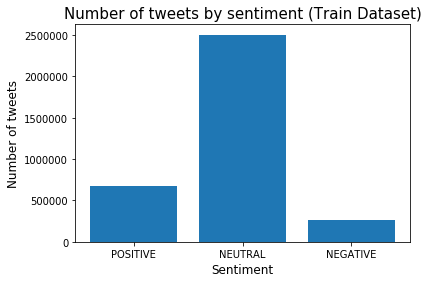

In [6]:
label = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
index = np.arange(len(label))
plt.bar(index, count_train)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Number of tweets by sentiment (Train Dataset)', fontsize=15)
plt.show()

In [7]:
# UPSAMPLING
def upsampling(input_file, output_file, ratio_upsampling=1):
    # Create a file with equal number of tweets for each label
    #    input_file: path to file
    #    output_file: path to the output file
    #    ratio_upsampling: ratio of each minority classes vs majority one. 1 mean there will be as much of each class than there is for the majority class 
    
    i=0
    counts = {}
    dict_data_by_label = {}
    count_pos_neu_neg = [0,0,0]

    # GET LABEL LIST AND GET DATA PER LABEL
    with open(input_file, 'r', newline='', encoding='utf-8-sig') as csvinfile: 
        csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
        for row in csv_reader:
            counts[row[0].split()[0]] = counts.get(row[0].split()[0], 0) + 1
            if not row[0].split()[0] in dict_data_by_label:
                dict_data_by_label[row[0].split()[0]]=[row[0]]
            else:
                dict_data_by_label[row[0].split()[0]].append(row[0])
            i=i+1
            if i%10000 ==0:
                print("Read: " + str(i))

    # FIND MAJORITY CLASS
    majority_class=""
    count_majority_class=0
    for item in dict_data_by_label:
        if len(dict_data_by_label[item])>count_majority_class:
            majority_class= item
            count_majority_class=len(dict_data_by_label[item])  
    
    # UPSAMPLE MINORITY CLASS
    data_upsampled=[]
    for item in dict_data_by_label:
        data_upsampled.extend(dict_data_by_label[item])
        if item != majority_class:
            items_added=0
            items_to_add = count_majority_class - len(dict_data_by_label[item])
            while items_added<items_to_add:
                data_upsampled.extend(dict_data_by_label[item][:max(0,min(items_to_add-items_added,len(dict_data_by_label[item])))])
                items_added = items_added + max(0,min(items_to_add-items_added,len(dict_data_by_label[item])))

    # WRITE ALL
    i=0

    with open(output_file, 'w', encoding='utf-8-sig') as txtoutfile:
        for row in data_upsampled:
            txtoutfile.write(row+ '\n' )
            if row.split()[0]  == '__label__POSITIVE':
                count_pos_neu_neg[0] += 1
            elif row.split()[0]  == '__label__NEUTRAL':
                count_pos_neu_neg[1] += 1
            elif row.split()[0]  == '__label__NEGATIVE':
                count_pos_neu_neg[2] += 1
            i=i+1
            if i%10000 ==0:
                print("Write: " + str(i))
    print('UPSAMPLING COMPLETED')
    return count_pos_neu_neg

In [8]:
count_upsampling = upsampling( 'tweets.train','uptweets.train')

Read: 10000
Read: 20000
Read: 30000
Read: 40000
Read: 50000
Read: 60000
Read: 70000
Read: 80000
Read: 90000
Read: 100000
Read: 110000
Read: 120000
Read: 130000
Read: 140000
Read: 150000
Read: 160000
Read: 170000
Read: 180000
Read: 190000
Read: 200000
Read: 210000
Read: 220000
Read: 230000
Read: 240000
Read: 250000
Read: 260000
Read: 270000
Read: 280000
Read: 290000
Read: 300000
Read: 310000
Read: 320000
Read: 330000
Read: 340000
Read: 350000
Read: 360000
Read: 370000
Read: 380000
Read: 390000
Read: 400000
Read: 410000
Read: 420000
Read: 430000
Read: 440000
Read: 450000
Read: 460000
Read: 470000
Read: 480000
Read: 490000
Read: 500000
Read: 510000
Read: 520000
Read: 530000
Read: 540000
Read: 550000
Read: 560000
Read: 570000
Read: 580000
Read: 590000
Read: 600000
Read: 610000
Read: 620000
Read: 630000
Read: 640000
Read: 650000
Read: 660000
Read: 670000
Read: 680000
Read: 690000
Read: 700000
Read: 710000
Read: 720000
Read: 730000
Read: 740000
Read: 750000
Read: 760000
Read: 770000
Read: 78

Write: 2470000
Write: 2480000
Write: 2490000
Write: 2500000
Write: 2510000
Write: 2520000
Write: 2530000
Write: 2540000
Write: 2550000
Write: 2560000
Write: 2570000
Write: 2580000
Write: 2590000
Write: 2600000
Write: 2610000
Write: 2620000
Write: 2630000
Write: 2640000
Write: 2650000
Write: 2660000
Write: 2670000
Write: 2680000
Write: 2690000
Write: 2700000
Write: 2710000
Write: 2720000
Write: 2730000
Write: 2740000
Write: 2750000
Write: 2760000
Write: 2770000
Write: 2780000
Write: 2790000
Write: 2800000
Write: 2810000
Write: 2820000
Write: 2830000
Write: 2840000
Write: 2850000
Write: 2860000
Write: 2870000
Write: 2880000
Write: 2890000
Write: 2900000
Write: 2910000
Write: 2920000
Write: 2930000
Write: 2940000
Write: 2950000
Write: 2960000
Write: 2970000
Write: 2980000
Write: 2990000
Write: 3000000
Write: 3010000
Write: 3020000
Write: 3030000
Write: 3040000
Write: 3050000
Write: 3060000
Write: 3070000
Write: 3080000
Write: 3090000
Write: 3100000
Write: 3110000
Write: 3120000
Write: 313

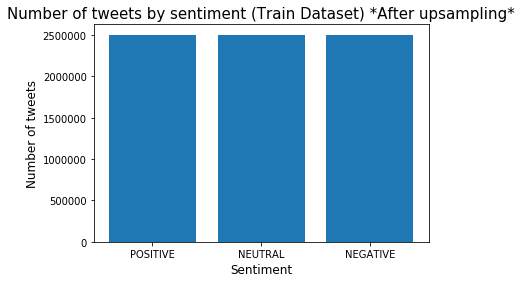

In [9]:
label = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
index = np.arange(len(label))
plt.bar(index, count_upsampling)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Number of tweets by sentiment (Train Dataset) *After upsampling*', fontsize=15)
plt.show()

In [10]:
# TRAINING
training_data_path ='uptweets.train' 
validation_data_path ='tweets.validation'
model_path ='Model/'
model_name="model-en"

def train():
    print('Training start')
    try:
        hyper_params = {"lr": 0.01,
                        "epoch": 20,
                        "wordNgrams": 2,
                        "dim": 20}     
                               
        print(str(datetime.datetime.now()) + ' START=>' + str(hyper_params) )

        # Train the model.
        print("Model trained with the hyperparameter \n {}".format(hyper_params))

        # CHECK PERFORMANCE
        print('Training completed')
        print(str(datetime.datetime.now()) + 'COMPLETE=>' + str(hyper_params) )
        
        #Test model
        print('Testing Model')
        model_acc_training_set = model.test(training_data_path)
        model_acc_validation_set = model.test(validation_data_path)
        
        # DISPLAY ACCURACY OF TRAINED MODEL
        text_line = str(hyper_params) +'\n' +" = > Accuracy:" + str(model_acc_training_set[1]) + '\n' + "Validation:" 
        + str(model_acc_validation_set[1]) + '\n' 
        print(text_line)
        
        #quantize a model to reduce the memory usage
        model.quantize(input=training_data_path, qnorm=True, retrain=True, cutoff=100000)
        
        print("Model is quantized!!")
        model.save_model(model_path + model_name + ".ftz")                            
    except Exception as e:
        print('Exception during training: ' + str(e) )

In [11]:
train()

Training start
2019-11-17 15:23:38.597583 START=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Training completed
2019-11-17 15:25:49.300328COMPLETE=>{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
Testing Model
{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 20}
 = > Accuracy:0.9844012504250009
Validation:0.8402377873641846

Model is quantized!!


In [6]:
# LOAD MODEL
model_path ='Model/'
model = fasttext.load_model(model_path+'model-en.ftz')

In [8]:
#  TESTING PART     
model.predict([input_text],k=1)[0][0][0] #OUTPUT :  '__label__NEGATIVE' or '__label__NEUTRAL'  or  '__label__POSITIVE'

Test:  ([['__label__POSITIVE']], [array([0.99889654], dtype=float32)])
Test2:  ([['__label__NEGATIVE', '__label__NEUTRAL', '__label__POSITIVE']], [array([0.7526342 , 0.22047487, 0.02692089], dtype=float32)])


'__label__NEUTRAL'

In [7]:
infile_path = 'data/'
infile_name = 'tweet.csv'

In [7]:
target_data = pd.read_csv(infile_path + infile_name,encoding = 'utf-8-sig')
target_data.head()

Tweet Created At                 User Name  \
0  2019-11-16 09:47:37      RIP Joe Keery’s Hair   
1  2019-11-16 09:45:03      RIP Joe Keery’s Hair   
2  2019-11-16 09:22:44            Steve Beckwith   
3  2019-11-16 09:20:53  Tommy Wiseau Fan Account   
4  2019-11-16 09:18:54               DEPLORABLES   

                                                Text  Retweet Count  \
0  Anyways I freakin lived #DoctorSleep and thoug...              0   
1  *Jacob Tremblay comes on screen in #DoctorSlee...              0   
2  RT @FilmNewsWeb: https://t.co/udSaRa5KVd Win D...             42   
3  Day 311 of #365movieschallenge, watched #Docto...              0   
4  RT @jeremywaltzer: Have you ever had a urge to...              1   

   Favorite Count  
0               0  
1               0  
2               0  
3               0  
4               0

In [8]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17401 entries, 0 to 17400
Data columns (total 5 columns):
Tweet Created At    17401 non-null object
User Name           17399 non-null object
Text                17401 non-null object
Retweet Count       17401 non-null int64
Favorite Count      17401 non-null int64
dtypes: int64(2), object(3)
memory usage: 679.8+ KB


In [8]:
# Predict 
with open('result/result_sentiment_'+infile_name, 'w', newline='', encoding = 'utf-8-sig') as output:    
    writer = csv.writer(output)
    header = ['Tweet Created At', 'User Name', 'Text', 'Sentiment']
    writer.writerow(header)
    with open(infile_path + infile_name, 'r', encoding='utf-8-sig') as f:
        reader = csv.DictReader(f)
        header = reader.fieldnames
        print(header)    
        pos = 0
        neu = 0
        neg = 0
        for row in reader:
            result = ''
            print('Tweet: ', row['Text'])
            text = tweet_cleaning(row['Text'])
            print('After Clean: ', text)
            if model.predict([text],k=1)[0][0][0] == '__label__POSITIVE':
                print ('Predict: POSITIVE')
                result = 'POSITIVE'
                pos += 1
            elif  model.predict([text],k=1)[0][0][0] == '__label__NEGATIVE':
                print('Predict: NEGATIVE')
                result = 'NEGATIVE'
                neg += 1
            elif model.predict([text],k=1)[0][0][0] == '__label__NEUTRAL':
                print('Predict: NEUTRAL')
                result = 'NEUTRAL'
                neu += 1                
            else:
                print('ALERT BUG !!!')        
            writer.writerow( [ row[header[0]], row[header[1]], row[header[2]], result ] )
            print('='*50)
        

['Tweet Created At', 'User Name', 'Text', 'Retweet Count', 'Favorite Count']
Tweet:  Anyways I freakin lived #DoctorSleep and thought it was great. That’s it. #DoctorSleepMovie
After Clean:  anyways i freakin lived and thought it was great that is it
Predict: POSITIVE
Tweet:  *Jacob Tremblay comes on screen in #DoctorSleep *
Me: geez why does Hollywood only use one little boy to play every little boy part in movies? 
*jacob does his scene* 
Me: Oh...dang yeah, yeah no that’s why. Give him all the parts!  #FreakingAmazing
After Clean:  jacob tremblay comes on screen in me geez why does hollywood only use one little boy to play every little boy part in movies jacob does his scene me oh dang yeah yeah no that is why give him all the parts
Predict: NEUTRAL
Tweet:  RT @FilmNewsWeb: https://t.co/udSaRa5KVd Win Doctor Sleep merchandise bundle and Stanley Kubrick film collection. Just follow &amp; RT/share wi…
After Clean:  win doctor sleep merchandise bundle and stanley kubrick film collectio

Predict: NEUTRAL
Tweet:  RT @boxofficemojo: Thursday Box Office: #Midway $1.3m; #LastChristmas $799k; #DoctorSleep $785k https://t.co/Ww5MRyBSMQ https://t.co/9pnBY5…
After Clean:  thursday box office $1 3m $799k $785k
Predict: NEUTRAL
Tweet:  RT @boxofficemojo: Thursday Box Office: #Midway $1.3m; #LastChristmas $799k; #DoctorSleep $785k https://t.co/Ww5MRyBSMQ https://t.co/9pnBY5…
After Clean:  thursday box office $1 3m $799k $785k
Predict: NEUTRAL
Tweet:  Thursday Box Office: #Midway $1.3m; #LastChristmas $799k; #DoctorSleep $785k https://t.co/Ww5MRyBSMQ https://t.co/9pnBY5DLVJ
After Clean:  thursday box office $1 3m $799k $785k
Predict: NEUTRAL
Tweet:  RT @KevinRBrackett: This week on @ReelSpoilers, we take on the film adaptation of @StephenKing's sequel to THE SHINING - #DoctorSleep. Find…
After Clean:  this week on we take on the film adaptation of 's sequel to the shining find…
Predict: NEUTRAL
Tweet:  RT @martin37725365: What a great year 2019 has turned out to be for cinema vint

After Clean:  new movie friday what are you seeing
Predict: NEUTRAL
Tweet:  RT @Terrorcast1: Be sure to check out our #podcast #movie #reviews for such #movies as #TerminatorDarkFate #doctorsleep
#AnnabelleComesHome…
After Clean:  be sure to check out our for such as …
Predict: NEUTRAL
Tweet:  If you thought The Shining couldn't have a decent sequel, you better think again. #DoctorSleep is brilliant https://t.co/FxaCJf7bBt
After Clean:  if you thought the shining could not have a decent sequel you better think again is brilliant
Predict: POSITIVE
Tweet:  RT @horrosreviews: Doctor Sleep was...

#DoctorSleep #horror
After Clean:  doctor sleep was
Predict: NEUTRAL
Tweet:  RT @Haley_Kline13: Rebecca Ferguson is absolutely incredible, that’s it, that’s the tweet. 🌹🎩

#art #horror #DoctorSleep #RebeccaFerguson #…
After Clean:  kline13 rebecca ferguson is absolutely incredible that is it that is the tweet #…
Predict: POSITIVE
Tweet:  RT @ElbaKroop: #DoctorSleep was incredible and not once do 

Predict: NEUTRAL
Tweet:  #DoctorSleep was literally one of the best films I’ve seen since Get Out 🔥♥️
After Clean:  was literally one of the best films i have seen since get out
Predict: POSITIVE
Tweet:  RT @KillerfromSpace: Now that many of you have seen #DoctorSleep, take a trip back to the Overlook Hotel with us in the latest episode of #…
After Clean:  now that many of you have seen take a trip back to the overlook hotel with us in the latest episode of #…
Predict: NEUTRAL
Tweet:  @StephenKing Saw it today, it was so good. I was on the edge of my seat throughout #DoctorSleep https://t.co/Z1LgkU0mrz
After Clean:  saw it today it was so good i was on the edge of my seat throughout
Predict: POSITIVE
Tweet:  #DoctorSleep deserved the hype and commercial reception that #ItChapter2 got and more. What an impressive belated sequel everyone should see on the big screen!

#filmtwitter #doctorsleepmovie #itchaptertwo #stephenking #horror #theshining #stanleykubrick https://t.co/l3sWnxAPs9
Aft

Tweet:  RT @kolbytoldme: *KTM Ep. 30*
The “Doctor Sleep” Edition
Yo, Yo, Yo, Wattup and Shout out to KT &amp; Oti of @ForYourRefPod 

https://t.co/nUkS…
After Clean:  ktm ep 30 the “doctor sleep” edition yo yo yo wattup and shout out to kt &amp oti of
Predict: NEUTRAL
Tweet:  RT @CrisMovieCorner: #DoctorSleep is going to be the movie that hits digital in a few months and film Twitter pirate (some will pay for) an…
After Clean:  is going to be the movie that hits digital in a few months and film twitter pirate (some will pay for) an…
Predict: POSITIVE
Tweet:  RT @shelleypetersen: I am not OK with watching a little boy covered in blood, terrified and writhing in pain as he’s tortured to death for…
After Clean:  i am not ok with watching a little boy covered in blood terrified and writhing in pain as he is tortured to death for…
Predict: NEGATIVE
Tweet:  RT @kolbytoldme: *KTM Ep. 30*
The “Doctor Sleep” Edition
Yo, Yo, Yo, Wattup and Shout out to KT &amp; Oti of @ForYourRefPod 

https://t.

After Clean:  i enjoyed so much ewan mcgregor was amazing i love abra's character how tough she was the movie was a per…
Predict: POSITIVE
Tweet:  Doctor Sleep was so great!! Cliff Curtis was amazing in it. #TWDFamily #DoctorSleep #DanTorrence #TheShining
After Clean:  doctor sleep was so great cliff curtis was amazing in it
Predict: POSITIVE
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @ComicBook: #DoctorSleep director Mike Flanagan is yet another filmmaker who says #ParasiteMovie is the best of 2019. 
https://t.co/Gq5e…
After Clean:  director mike flanagan is yet another filmmaker who says is the best of 2019
Predict: NEUTRAL
Tweet:  RT @SuperGamesite64: The verdict is in: #DoctorSleep is pretty good! Check out our full review of this Stephen King adaptation/Kubrick's Th…
After Clean:  the verdict is 

Predict: NEUTRAL
Tweet:  doctor sleep super movie! Rebecca Ferguson played her part admirably 😭😭😭 #DoctorSleep https://t.co/H064GZ9QyP
After Clean:  doctor sleep super movie rebecca ferguson played her part admirably
Predict: NEUTRAL
Tweet:  RT @insideofyoupod: MIKE FLANAGAN, direct of Doctor Sleep, talks this week on what it’s like creating horror films to entertain and scare v…
After Clean:  mike flanagan direct of doctor sleep talks this week on what it is like creating horror films to entertain and scare v…
Predict: NEGATIVE
Tweet:  RT @ComicBook: #DoctorSleep director Mike Flanagan is yet another filmmaker who says #ParasiteMovie is the best of 2019. 
https://t.co/Gq5e…
After Clean:  director mike flanagan is yet another filmmaker who says is the best of 2019
Predict: NEUTRAL
Tweet:  #DoctorSleep is pretty much full on Mike Flanagan so if you like his work you'll like this.   The story is pretty good the shinning call backs are nice I don't know how it compares to the book but I r

After Clean:  built a universe with his and reversed cynicism from in a masterf…
Predict: NEUTRAL
Tweet:  RT @soimwatching: We feel pretty medium about #TheShining but GREAT about #DoctorSleep! Take a listen to us talk about both and let us know…
After Clean:  we feel pretty medium about but great about take a listen to us talk about both and let us know…
Predict: POSITIVE
Tweet:  @StephenKing  just seen #DoctorSleep I thought the movie was great myself.   Looking forward to going back and reading the books.
After Clean:  just seen i thought the movie was great myself looking forward to going back and reading the books
Predict: POSITIVE
Tweet:  We revisit the world of #TheShining with its sequel, #DoctorSleep. We also discuss the issue of resurrecting #JamesDean through CGI.

Listen on iTunes, Stitcher, Spotify and Google Play or at https://t.co/x8nga95OxU. 

#Podcasts #MovieReviews #Cinema #pride48 #StephenKing #lgbtq https://t.co/Kqpbx3R4VZ
After Clean:  we revisit the world of with 

Tweet:  RT @KillerfromSpace: If you have any interest in #DoctorSleep at all, PLEASE go see it. It’s a beautiful horror epic &amp; a great King adaptat…
After Clean:  if you have any interest in at all please go see it it is a beautiful horror epic &amp a great king adaptat…
Predict: POSITIVE
Tweet:  RT @SecondaryHeroes: Listen NOW:

Secondary Heroes #Podcast Episode 39: Name Game - Who Are The Best #PopCulture Icons?

Who's the best Ste…
After Clean:  listen now secondary heroes episode 39 name game who are the best icons who is the best ste…
Predict: POSITIVE
Tweet:  #DoctorSleepMovie Because of this movie's #title I slept through most of the #movie.  #DoctorSleep
After Clean:  because of this movie's i slept through most of the
Predict: POSITIVE
Tweet:  RT @THR: How #DoctorSleep stands out from the crowd of horror films https://t.co/8ype8uDoEo
After Clean:  how stands out from the crowd of horror films
Predict: NEUTRAL
Tweet:  RT @MMandOscar: It's our #Movie Event #Review of #Doctor

Tweet:  RT @boxofficemojo: Monday Box Office:   #Midway $3.2m; #PlayingwithFire $2.2m; #DoctorSleep $1.6m https://t.co/v9Zul1Wp0Y https://t.co/jJ97…
After Clean:  monday box office $3 2m $2 2m $1 6m
Predict: NEUTRAL
Tweet:  RT @LulaCharlie: I enjoyed #DoctorSleep so much. Ewan McGregor was amazing, I love Abra's character, how tough she was. The movie was a per…
After Clean:  i enjoyed so much ewan mcgregor was amazing i love abra's character how tough she was the movie was a per…
Predict: POSITIVE
Tweet:  If you can make peace with the fact that no sequel could ever compare to Stanley Kubrick's "The Shining," then you might possibly enjoy the imperfect, but enjoyable, #DoctorSleep. Here's my belated review: https://t.co/R0eH5kub1K https://t.co/D45Q5Jv6B3
After Clean:  if you can make peace with the fact that no sequel could ever compare to stanley kubrick's "the shining " then you might possibly enjoy the imperfect but enjoyable here's my belated review
Predict: POSITIVE
Tweet:  RT @J

After Clean:  doctor sleep grossed an estimated $1 63m on monday 4 day total stands at $15 74m …
Predict: NEUTRAL
Tweet:  RT @boxofficemojo: Weekend Box Office Estimates: #Midway $17.5m; #DoctorSleep $14.1m; #PlayingwithFire $12.8m https://t.co/lU2OnZROrk https…
After Clean:  weekend box office estimates $17 5m $14 1m $12 8m
Predict: NEUTRAL
Tweet:  RT @boxofficemojo: Weekend #BoxOffice Actuals: #Midway $17.8m; #DoctorSleep $14.1m; #PlayingwithFire $12.7m https://t.co/jQ3far0sQu https:/…
After Clean:  weekend actuals $17 8m $14 1m $12 7m
Predict: NEUTRAL
Tweet:  Any time I see Henry Thomas in a @flanaganfilm film/show, it feels like a very specific gift to me! Was thrilled to see him in #DoctorSleep
After Clean:  any time i see henry thomas in a film/show it feels like a very specific gift to me was thrilled to see him in
Predict: POSITIVE
Tweet:  Really enjoyed #DoctorSleep Felt it balanced faithfulness to the book, and the film well.
After Clean:  really enjoyed felt it balanced fait

After Clean:  should you spend your time and money on a ticket for check out our parking lot review here
Predict: NEUTRAL
Tweet:  I really enjoyed #DoctorSleep this weekend but apparently few others did.  It was one of the better #StephenKing adaptations, not a fan of alot of the other movies.

https://t.co/PHQVpEMVXh.
After Clean:  i really enjoyed this weekend but apparently few others did it was one of the better adaptations not a fan of alot of the other movies
Predict: POSITIVE
Tweet:  RT @KillerfromSpace: If you have any interest in #DoctorSleep at all, PLEASE go see it. It’s a beautiful horror epic &amp; a great King adaptat…
After Clean:  if you have any interest in at all please go see it it is a beautiful horror epic &amp a great king adaptat…
Predict: POSITIVE
Tweet:  Might have a crush on Rebecca Ferguson. Oh my god. #DoctorSleep
After Clean:  might have a crush on rebecca ferguson oh my god
Predict: NEUTRAL
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multi

After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @RcThompson24: Y'all need to stop disrespecting #DoctorSleep and get out to your local theater ASAP. 😤😤
After Clean:  you all need to stop disrespecting and get out to your local theater asap
Predict: NEGATIVE
Tweet:  RT @BootsToReboots: How do you like it?
The Maniacal Cinephile reviews #DoctorSleep. Come play with us...
https://t.co/HgRexNj9Cw
After Clean:  ho

Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @JaydenKeeler1: Danny Torrance back in the Overlook:
#DoctorSleep https://t.co/6IrlRtOJVo
After Clean:  danny torrance back in the overlook
Predict: NEUTRAL
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @ManiacsMonsters: Today’s #MirrorMonday #HorrorMirrors recognizes the release of #DoctorSleep. Have you seen it yet, @kinky_horror? http…
After Clean:  today's recognizes the release of have you seen it yet horror
Predict: NEUTRAL
Tweet:  RT @enfermosdecine: Please dont miss #DoctorSleep in cinemas. Yest

Tweet:  Doctor Sleep- MOVIE REVIEW

https://t.co/wmzTza8ZtR

#DoctorSleep #TheShining
After Clean:  doctor sleep movie review
Predict: NEUTRAL
Tweet:  RT @That_Short_Nerd: Loved #DoctorSleep even more the second time around. Such a great, atmospheric sequel to one of my all-time favorite f…
After Clean:  short nerd loved even more the second time around such a great atmospheric sequel to one of my all time favorite f…
Predict: POSITIVE
Tweet:  RT @fadingstarlite: Believe the hype. Go see #DoctorSleep. In IMAX this week if you can. It was a beautifully shot masterpiece. https://t.c…
After Clean:  believe the hype go see in imax this week if you can it was a beautifully shot masterpiece
Predict: POSITIVE
Tweet:  RT @poppourreview: #NewEpisodeAlert🚨 Our new episode “The World Will Shine Again”, our review of #DoctorSleep! 

We also discuss #JamesDean…
After Clean:  our new episode “the world will shine again” our review of we also discuss …
Predict: NEUTRAL
Tweet:  RT @KillerfromSpace: If

After Clean:  is "one of the greatest horror sequels of all time " see the cinematic masterpiece at now and bo…
Predict: POSITIVE
Tweet:  #MikeFlanagan's #DoctorSleep manages to build upon #TheShining #TheShiningMovie while reshaping its story almost 40 years later &amp; still telling it's own horrific tale. #DareToGoBack to the #OverlookHotel and witness it for yourself.#DrSleep #DrSleepMovie #DoctorSleepMovie #Horror https://t.co/P7zL2rudd6
After Clean:  's manages to build upon while reshaping its story almost 40 years later &amp still telling it is own horrific tale to the and witness it for yourself
Predict: NEUTRAL
Tweet:  #DoctorSleep might not have done well at the weekend’s box-office but it’s a very good movie. Can’t believe some people passed on the opportunity to see the #OverlookHotel in all it’s glory on the big screen. https://t.co/FF1gwHl4cH
After Clean:  might not have done well at the weekend's box office but it is a very good movie cannot believe some people passed o

After Clean:  rewatched the shining last night in preparation of seeing doctor sleep today so excited to sit down and watch this one i'll…
Predict: POSITIVE
Tweet:  RT @BootsToReboots: How do you like it?
The Maniacal Cinephile reviews #DoctorSleep. Come play with us...
https://t.co/HgRexNj9Cw
After Clean:  how do you like it the maniacal cinephile reviews come play with us
Predict: NEGATIVE
Tweet:  A lot of good came out of our #DoctorSleep discussion on this week's @OutNow_Podcast. Enjoy it here. https://t.co/qDmjtzj0p4 https://t.co/9gwgIO048y
After Clean:  a lot of good came out of our discussion on this week's podcast enjoy it here
Predict: POSITIVE
Tweet:  RT @jonathanjstone0: All these articles in the Hollywood trade rags regarding #DoctorSleep https://t.co/iKXPNR7aE3
After Clean:  all these articles in the hollywood trade rags regarding
Predict: NEUTRAL
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Hous

After Clean:  best wishes to (cuz the video is an omage stanley kubrick's the shining movie ) also still reading feeling a bit like young annie wilkes with all the joy (pun not intended) of reading
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @Tessicat: Rebecca Ferguson in #DoctorSleep is crazy cult hippie chic. Kind of love her. https://t.co/vrqSyo1Sex
After Clean:  rebecca ferguson in is crazy cult hippie chic kind of love her
Predict: NEUTRAL
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy A

Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes

Tweet:  RT @rameshlaus: Nov 8th -10th #Chennai City BO - Top 5:

1. #Bigil

2. #Kaithi

3. #Bala

4. #MigaMigaAvasaram

5. #DoctorSleep
After Clean:  nov 8th 10th city bo top 5 1 2 3 4 5
Predict: NEUTRAL
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  Oh my feelings #DoctorSleep
After Clean:  oh my feelings
Predict: NEUTRAL
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national multiplexes in % (8 10th nov) 51% 7% 33% …
Predict: POSITIVE
Tweet:  RT @atulmohanhere: Avg Weekend Occupancy At National Multiplexes In % (8-10th Nov)
#Bala 51%
#SatelliteShankar 7%
#Housefull4 33%
#SaandKiA…
After Clean:  avg weekend occupancy at national m

After Clean:  was everything might be the first time i have ever geeked out over a horror movie well worth the wait thank you
Predict: POSITIVE
Tweet:  RT @FreddyInSpace: Box office isn't everything &amp; time will no doubt be very kind to #DoctorSleep, but it's quite strange to see a movie alm…
After Clean:  box office is not everything &amp time will no doubt be very kind to but it is quite strange to see a movie alm…
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @rameshlaus: Nov 8th -10th #Chennai City BO - Top 5:

1. #Bigil

2. #Kaithi

3. #Bala

4. #MigaMigaAvasaram

5. #DoctorSleep
After Clean:  nov 8th 10th city bo top 5 1 2 3 4 5
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moo

After Clean:  box office is not everything &amp time will no doubt be very kind to but it is quite strange to see a movie alm…
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @FreddyInSpace: Box office isn't everything &amp; time will no doubt be very kind to #DoctorSleep, but it's quite strange to see a movie alm…
After Clean:  box office is not everything &amp time will no doubt be very kind to but it is quite strange to see a movie alm…
Predict: NEUTRAL
Tweet:  RT @rameshlaus: Nov 8th -10th #Chennai City BO - Top 5:

1. #Bigil

2. #Kaithi

3. #Bala

4. #MigaMigaAvasaram

5. #DoctorSleep
After Clean:  nov 8th 10th city bo top 5 1 2 3 4 5
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moo

After Clean:  a daring sequel to a classic film that shines in its own light director 's i…
Predict: POSITIVE
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  Saw #DoctorSleep on Tuesday night last week (advance screening). A superb successor to Kubrick's The Shining, but film wasn't that great.

Wasn't that scary and while I admire the production value and Flanagan's direction, the film didn't grab me emotionally.
After Clean:  saw on tuesday night last week (advance screening) a superb successor to kubrick's the shining but film was not that great was not that scary and while i admire the production value and flanagan's direction the film did not grab me emotionally
Predict: POSITIVE
Tweet:  RT @Scootsworth: Danny and Abra leading Rose to the overlook hotel:
#DoctorSleep https://t.co/TqtC3aIx7W
After Clean: 

After Clean:  xoxo if you are a fan of the good ol classic film you have to see hands down best sequel to a movie t…
Predict: POSITIVE
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @rameshlaus: Nov 8th -10th #Chennai City BO - Top 5:

1. #Bigil

2. #Kaithi

3. #Bala

4. #MigaMigaAvasaram

5. #DoctorSleep
After Clean:  nov 8th 10th city bo top 5 1 2 3 4 5
Predict: NEUTRAL
Tweet:  RT @LulaCharlie: I enjoyed #DoctorSleep so much. Ewan McGregor was amazing, I love Abra's character, how tough she was. The movie was a per…
After Clean:  i enjoyed so much ewan mcgregor was amazing i love abra's 

Tweet:  RT @nuyangwriter: My review of #DoctorSleep @flanaganfilm @StephenKing https://t.co/j5OmD1ajfs
After Clean:  my review of
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  Me freaking out with joy when I saw Zahn McClarnon and Clifford Curtis in #DoctorSleep | #NativeTwitter #nativeexcellence #StephenKing https://t.co/sdKDYOFpsW
After Clean:  me freaking out with joy when i saw zahn mcclarnon and clifford curtis in |
Predict: POSITIVE
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Mootho

After Clean:  was phenomenal and arguably as good in some cases better than the shining and i cannot stop thinking or saying wtf at how low of a box office hit it was honestly what the hell it is not just a brilliant sequel but a great film too and it was beat by
Predict: POSITIVE
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top gr

After Clean:  henry thomas (aka elliott from e t ) played jack torrance in and i am losing my mind
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @BDisgusting: Mike Flanagan on How #DoctorSleep Changes the Way We Understand 'The Shining's' Jack Torrance [Interview] https://t.co/Ilz…
After Clean:  mike flanagan on how changes the way we understand 'the shining's' jack torrance [interview]
Predict: NEUTRAL
Tweet:  Superb picture. Thematically rich and tastefully done. Another win for @wbpictures in the horror/thriller genre. #EwanMcGregor hasn’t had the chance to be this good in a long while. And my God, #RebeccaFerguson! Put her in EVERYTHING. And the callbacks? 👌🏾 #DoctorSleep
After Clean:  superb picture thematically rich and tastefully done another win for in the horror/thriller genre h

Tweet:  RT @TT_EwanMcGregor: @MonsterManiaCon: 'Horror fans: want more great horror films? Go to the theatre and support @flanaganfilm @CarlLumbly…
After Clean:  ewanmcgregor 'horror fans want more great horror films go to the theatre and support …
Predict: POSITIVE
Tweet:  I enjoyed #DoctorSleep
After Clean:  i enjoyed
Predict: POSITIVE
Tweet:  RT @VctmsAndVillans: Everyone is screaming about our latest episode on #TheShining &amp; #DoctorSleep. Have you heard it yet? https://t.co/0C9r…
After Clean:  everyone is screaming about our latest episode on &amp have you heard it yet
Predict: NEUTRAL
Tweet:  RT @MohAlShammeri: Doctor Sleep, wow. It was the most emotional horror thriller journey, that I was NOT expecting so, hats off to the Direc…
After Clean:  doctor sleep wow it was the most emotional horror thriller journey that i was not expecting so hats off to the direc…
Predict: NEUTRAL
Tweet:  Amen. Go see it on the biggest screen while you can! Return to the overlook and be fully imme

Tweet:  RT @FreddyInSpace: Anyway, #DoctorSleep is a great movie no matter how much money it makes or doesn't make. So much to talk about, write ab…
After Clean:  anyway is a great movie no matter how much money it makes or does not make so much to talk about write ab…
Predict: POSITIVE
Tweet:  RT @missmarighould: #doctorsleep rose the hat: https://t.co/nYULVAGIdO
After Clean:  rose the hat
Predict: NEUTRAL
Tweet:  RT @Tessicat: Rebecca Ferguson in #DoctorSleep is crazy cult hippie chic. Kind of love her. https://t.co/vrqSyo1Sex
After Clean:  rebecca ferguson in is crazy cult hippie chic kind of love her
Predict: NEUTRAL
Tweet:  RT @Rhymeswithbowl: With #DoctorSleep coming out it's a good time to remind everyone that Shelly Duvall gave us one of the best performance…
After Clean:  with coming out it is a good time to remind everyone that shelly duvall gave us one of the best performance…
Predict: POSITIVE
Tweet:  RT @FreddyInSpace: Box office isn't everything &amp; time will no doubt b

After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @FreddyInSpace: Anyway, #DoctorSleep is a great movie no matter how much money it makes or doesn't make. So much to talk about, write ab…
After Clean:  anyway is a great movie no matter how much money it makes or does not make so much to talk about write ab…
Predict: POSITIVE
Tweet:  RT @FreddyInSpace: Box office isn't everything &amp; time will no doubt be very kind to #DoctorSleep, but it's quite strange to see a movie alm…
After Clean:  box office is not everything &amp time will no doubt be very kind to but it is quite strange to see a movie alm…
Predict: NEUTRAL
Tweet:  #DoctorSleep keeps getting better and better. #RWBY https://t.co/bjaSt266LL
After Clean:  keeps getting better and better
Predict: POSITIVE
Tweet:  RT @austin_chesnutt: Everybody please go see #DoctorSleep this week. @flanaganfilm has delivered a dark, emotional, and horrifying successo…
After Clean:  chesnutt everybody pleas

6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @HorrorZone607: Check out Mike C's Review of Doctor Sleep!

#HZ607 #DoctorSleep #Review #horror #HorrorFamily #horrormovie #607podcasts…
After Clean:  check out mike c's review of doctor sleep …
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac: Chennai city weekend BO top grossers,

1 #Bigil
2 #Kaithi
3 #Bala
4 #MigaMigaAvasaram
5 #DoctorSleep
6 #Moothon
After Clean:  chennai city weekend bo top grossers 1 2 3 4 5 6
Predict: NEUTRAL
Tweet:  RT @LMKMovieManiac

After Clean:  the disappointing box office numbers of and give me no hope for humanity what is wrong with people today
Predict: NEGATIVE
Tweet:  RT @warnerbrosindia: "The Best #StephenKing adaptation since Shawshank Redemption." Stephen King’s #DoctorSleep is in cinemas now.

Book ti…
After Clean:  "the best adaptation since shawshank redemption " stephen king's is in cinemas now book ti…
Predict: POSITIVE
Tweet:  Shout out to Rose the Hat's boho style in #DoctorSleep  
https://t.co/Y5bgFtfWqZ https://t.co/3vlI2ia7ca
After Clean:  shout out to rose the hat's boho style in
Predict: POSITIVE
Tweet:  RT @BDisgusting: ‘Near Dark’: @HauntedMeg Travels With Horror’s Original Winnebago Vampires! #DoctorSleep https://t.co/SpgYFKtuqY
After Clean:  ‘near dark' travels with horror's original winnebago vampires
Predict: NEUTRAL
Tweet:  RT @Variety: #Midway defeats #DoctorSleep in box office upset https://t.co/gbNj1p57da
After Clean:  defeats in box office upset
Predict: NEGATIVE
Tweet:  RT @Brezni

After Clean:  online says mike flanagan's manages to be both entertaining and profound otherworldly yet grounded …
Predict: POSITIVE
Tweet:  #DoctorSleep Introduces Its Own Version of Jessica Jones' Purple Man
https://t.co/ZRmai5zbrc https://t.co/xDyLEfH9lm
After Clean:  introduces its own version of jessica jones' purple man
Predict: POSITIVE
Tweet:  @coldslutsonfire Disasterina the Hat 🎩
#DoctorSleep https://t.co/n6rfVSVl9a
After Clean:  disasterina the hat
Predict: NEUTRAL
Tweet:  RT @Fresh_Flames1: Spoiler Alert 🚨 
The Person Who Shines 🔦
The Brightest In #DoctorSleep 
Is A Black Girl 👧🏽
After Clean:  flames1 spoiler alert the person who shines the brightest in is a black girl
Predict: NEUTRAL
Tweet:  RT @wiccaburr: Watched @DoctorSleepFilm and it is definitely worth seeing. The film pays homage to The Shining and the ending is quite chil…
After Clean:  watched and it is definitely worth seeing the film pays homage to the shining and the ending is quite chil…
Predict: POSITIVE
Twee

After Clean:  rebecca ferguson in is crazy cult hippie chic kind of love her
Predict: NEUTRAL
Tweet:  RT @HaleighFoutch: #DoctorSleep is another trauma-fuelled emotional horror from Flanagan that made me ugly cry in public. Understandably sh…
After Clean:  is another trauma fuelled emotional horror from flanagan that made me ugly cry in public understandably sh…
Predict: NEGATIVE
Tweet:  It's one of the biggest mysteries that exists today... Sasquatch!!!
The Crater Mountain Sasquatch Legend https://t.co/N736uFAE3V
#DoctorSleep #giftideas #RTExtraLife2019 #ChristmasCountdown https://t.co/cpvuon8xPC
After Clean:  it is one of the biggest mysteries that exists today sasquatch the crater mountain sasquatch legend
Predict: NEUTRAL
Tweet:  RT @PlatinumEquinox: Ok guys. I saw that new movie DOCTOR SLEEP (Stephen King based movie) obviously with a few alterations. The movie was…
After Clean:  ok guys i saw that new movie doctor sleep (stephen king based movie) obviously with a few alterations 

After Clean:  if you have not seen in theaters yet you are missing out on a masterpiece the movie is what any cons…
Predict: POSITIVE
Tweet:  RT @BrizzyVoices: #DOCTORSLEEP IS SO. FREAKIN. GOOOOOOD. 

If any buds wanna see it I kinda wanna go again.....👀 https://t.co/Xt1U6Ga6kg
After Clean:  is so freakin good if any buds want to see it i kind of want to go again
Predict: POSITIVE
Tweet:  RT @nerdist: #DoctorSleep's villain might be the best in any Stephen King story. https://t.co/hb5KN8ZVzK
After Clean:  's villain might be the best in any stephen king story
Predict: NEUTRAL
Tweet:  RT @CinemaLoversCLB: CLC’s Official #DoctorSleep Review: A bludgeoningly-dark, sumptuous slow-burn w/new genre-icon in Rose The Hat, phenom…
After Clean:  clc's official review a bludgeoningly dark sumptuous slow burn w/new genre icon in rose the hat phenom…
Predict: NEGATIVE
Tweet:  #DoctorSleep looking at her filmography, I’m pretty sure I’ve only seen Rebecca Ferguson in one other thing before, that bei

After Clean:  saw was good super glad they were so loyal to the book having the overlook to loom in and over the climax of the film worked beautifully good job cough adapt the tommyknockers next cough
Predict: POSITIVE
Tweet:  RT @JustinHBenson: #DoctorSleep by the amazing @flanaganfilm is a miracle of a movie. Very few genre films this bold will ever get this wid…
After Clean:  by the amazing is a miracle of a movie very few genre films this bold will ever get this wid…
Predict: POSITIVE
Tweet:  @flanaganfilm seeing this version of the logo, with that music, gave me chills. #DoctorSleep https://t.co/mzkrwqtV0r
After Clean:  seeing this version of the logo with that music gave me chills
Predict: POSITIVE
Tweet:  Excellent discussion. Appreciate answering my question. Thankfully, we don’t have to choose - we get a world where the book and the film both thrive. And if the reviews are right, #DoctorSleep honors both and shows how important King and Kubrick’s visions are. https://t.co/L1FY

After Clean:  wow “doctor sleep” is much more than just another visit to the overlook flanagan manages to perfectly marry king &amp kubrick…
Predict: NEUTRAL
Tweet:  RT @Slash: Check out #DoctorSleep iiii]; )' https://t.co/yIEVPgTuMD
After Clean:  check out ii] )'
Predict: NEUTRAL
Tweet:  RT @Slash: Check out #DoctorSleep iiii]; )' https://t.co/yIEVPgTuMD
After Clean:  check out ii] )'
Predict: NEUTRAL
Tweet:  Disappointed and empty after watching #DoctorSleep . Felt like a mix of Harry Potter and twilight https://t.co/BX5mXHnsJE
After Clean:  disappointed and empty after watching felt like a mix of harry potter and twilight
Predict: NEGATIVE
Tweet:  Doctor Sleep Review #movies #DoctorSleepMovie #DoctorSleep #StephenKing #MovieReview  https://t.co/wcCyreG7XZ
After Clean:  doctor sleep review
Predict: NEUTRAL
Tweet:  #DoctorSleep was so damn good! 👏🏻
After Clean:  was so damn good
Predict: POSITIVE
Tweet:  RT @The_Boi_Wunda: #DoctorSleep was great! Scary, tense, and Ewan McGregor and Re

After Clean:  my thoughts on 's exceptional doctor sleep death childhood trauma and the eternal nature of ghosts that…
Predict: POSITIVE
Tweet:  @TheOtherScottM I loved #doctorsleep awesome movie and Mike Flanagan is a genius but there is no way in hell that it’s better than the Green Mile. I get movies are subjective but that’s an absurd statement . #movies #movie #horror #stephenking https://t.co/sL9M7oRB9D
After Clean:  i loved awesome movie and mike flanagan is a genius but there is no way in hell that it is better than the green mile i get movies are subjective but that is an absurd statement
Predict: POSITIVE
Tweet:  RT @THR: Box Office: #Midway downs #DoctorSleep in surprise upset https://t.co/MidBzvmCcG https://t.co/sGMTyLxIED
After Clean:  box office downs in surprise upset
Predict: NEGATIVE
Tweet:  RT @RICHARDLNEWBY: My thoughts on @flanaganfilm’s exceptional Doctor Sleep, death, childhood trauma, and the eternal nature of ghosts that…
After Clean:  my thoughts on 's exceptio

After Clean:  friday box office estimates $6 3m 2m $4 06m
Predict: NEUTRAL
Tweet:  I’m gonna be real controversial and say I loved #DoctorSleep much more than The Shining. The Shining has never been one of my favorite horror films honestly, I appreciate its legacy! But I never got as invested in the story whereas Doctor Sleep had me from the beginning.
After Clean:  i am going to be real controversial and say i loved much more than the shining the shining has never been one of my favorite horror films honestly i appreciate its legacy but i never got as invested in the story whereas doctor sleep had me from the beginning
Predict: POSITIVE
Tweet:  Going to see #DoctorSleep today so we had to rewatch The Shining last night... and I found a Disney + Shining connection. https://t.co/mgkafHwadg
After Clean:  going to see today so we had to rewatch the shining last night and i found a disney + shining connection
Predict: POSITIVE
Tweet:  Let's do this 🙌 #DoctorSleep https://t.co/PidvGCjX6w
Af

After Clean:  we will be reviewing on the podcast in a few weeks for now you can read my full written review of in a guest review over at
Predict: NEUTRAL
Tweet:  C'mon horror fans, go see #DoctorSleep. Ya'll come out for every fuckin' Annabelle movie, but are gonna sit this one out? 

(side note: I like two of the Annabelle movies, but ya know what I'm trying to say here.) 

Anyways, go see Doctor Sleep.
After Clean:  c'mon horror fans go see ya'll come out for every fuckin' annabelle movie but are going to sit this one out (side note i like two of the annabelle movies but ya know what i am trying to say here ) anyways go see doctor sleep
Predict: NEUTRAL
Tweet:  RT @ObsessiveViewer: The fine folks at @Hypable let me invade their site with a review of #DoctorSleep, which I loved! Check out my review:…
After Clean:  the fine folks at let me invade their site with a review of which i loved check out my review …
Predict: POSITIVE
Tweet:  RT @jm_world13: #DoctorSleep had big shoes to fill

After Clean:  if eleven from stranger things had a movie
Predict: NEUTRAL
Tweet:  "Its desire to honor the Kubrick film and the King legacy is at odds with itself..."
#DoctorSleep #DoctorSleepMovie #TheShining #movies #reviews 

https://t.co/NQPGGqGXW3
After Clean:  "its desire to honor the kubrick film and the king legacy is at odds with itself "
Predict: NEUTRAL
Tweet:  RT @sttepodcast: It's #podcast time! We review #DoctorSleep and rewatch #FightClub. Get it in your ears:

https://t.co/uoIHyTEunZ

#DrSleep…
After Clean:  it is time we review and rewatch get it in your ears …
Predict: NEUTRAL
Tweet:  The stars of #DoctorSleep talk about the scenes they are most excited for fans of The Shining to see on the big screen. https://t.co/W48gyKkokW
After Clean:  the stars of talk about the scenes they are most excited for fans of the shining to see on the big screen
Predict: POSITIVE
Tweet:  RT @Variety: Box office: #Midway could defeat #DoctorSleep with $21 million https://t.co/edyQwib7XE 

After Clean:  astoundingly underwhelming would be an understatement just plain bad
Predict: NEGATIVE
Tweet:  If you liked The Shining, Doctor Sleep is definitely worth your time, and worth seeing in theaters! #DoctorSleep
After Clean:  if you liked the shining doctor sleep is definitely worth your time and worth seeing in theaters
Predict: POSITIVE
Tweet:  "Doctor Sleep" is in theatres! Have you seen the latest TRAILERS? @dylanblackradio @DoctorSleepFilm #DoctorSleep 
https://t.co/iHvQ8PFd2x
After Clean:  "doctor sleep" is in theatres have you seen the latest trailers
Predict: NEUTRAL
Tweet:  RT @GiteshPandya: #DoctorSleep opened to $5.2M on opening day FRI heading to about $14M. #LastChristmas debuted to $4.1M at FRI #boxoffice…
After Clean:  opened to $5 2m on opening day fri heading to about $14m debuted to $4 1m at fri …
Predict: NEUTRAL
Tweet:  Go see #DoctorSleep I’m telling you! If you want straight up goosebumps 😱 Definitely worth going to see
After Clean:  go see i am telling 

After Clean:  mayajaal show count for tomorrow top 4 (week 3) 11 sh (week 3) 11 sh 3 sh 3 sh
Predict: NEUTRAL
Tweet:  What happens when a movie is influenced by #StanleyKubrick and based on a book by #StephenKing . 
Utter beauty #DoctorSleep 
Only thing missing was "here's Danny".
#mikeflanagan  did an awesome work.
After Clean:  what happens when a movie is influenced by and based on a book by utter beauty only thing missing was "here's danny" did an awesome work
Predict: POSITIVE
Tweet:  #DoctorSleep and the competing legacies of two visionaries https://t.co/2qTCbCvIm2 https://t.co/1qoV3G9suk
After Clean:  and the competing legacies of two visionaries
Predict: NEUTRAL
Tweet:  Dare to go back @DoctorSleepFilm. Get your tickets https://t.co/2Af4Ql1j6N... #Patahapa #DoctorSleep #DoctorSleepMovie https://t.co/gkHsOOlpVr
After Clean:  dare to go back get your tickets
Predict: NEUTRAL
Tweet:  RT @Ajaychairman: Mayajaal show count for tomorrow.
Top 4:

#Bigil (Week 3) 11 sh
#Kaithi (Week 3)

Tweet:  .@StephenKing's #DoctorSleep is far better than it has any right to be. 
My review:

https://t.co/KJwR3qehTM https://t.co/LHbYaaa7kh
After Clean:  's is far better than it has any right to be my review
Predict: NEUTRAL
Tweet:  RT @sttepodcast: It's #podcast time! We review #DoctorSleep and rewatch #FightClub. Get it in your ears:

https://t.co/uoIHyTEunZ

#DrSleep…
After Clean:  it is time we review and rewatch get it in your ears …
Predict: NEUTRAL
Tweet:  Wet to see #DoctorSleep last night. Very good I though, podcast will be coming soon. 
But I thought I'd share my little short from a couple of years ago that played homage to some of the films we watched during Halloween. 
#TheShining was one of them. 

https://t.co/8YdxiZCO0X
After Clean:  wet to see last night very good i though podcast will be coming soon but i thought i'd share my little short from a couple of years ago that played homage to some of the films we watched during halloween was one of them
Predict: POSITIVE


Predict: POSITIVE
Tweet:  I really liked #DoctorSleep. Fantastic
After Clean:  i really liked fantastic
Predict: POSITIVE
Tweet:  RT @JulienFaddoul: Hi everyone, I have 10 short reviews for you this week. Enjoy :)

#JojoRabbit
#TheKing
#HarrietMovie
#DoctorSleep
#LastC…
After Clean:  hi everyone i have 10 short reviews for you this week enjoy ) …
Predict: POSITIVE
Tweet:  RT @sttepodcast: It's #podcast time! We review #DoctorSleep and rewatch #FightClub. Get it in your ears:

https://t.co/uoIHyTEunZ

#DrSleep…
After Clean:  it is time we review and rewatch get it in your ears …
Predict: NEUTRAL
Tweet:  RT @FreddyInSpace: If you're a fan of Stephen King, Stanley Kubrick's The Shining and/or Mike Flanagan, please make sure you go see #Doctor…
After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  DOCTOR SLEEP is one of the most thrillingly satisfying horror films I’ve seen in quite some time

After Clean:  was so so good will be starting the book next week hopefully
Predict: POSITIVE
Tweet:  RT @KillerfromSpace: #DoctorSleep stumbles a bit in trying to connect Kubrick’s film &amp; King’s novel, but its a well-crafted horror epic tha…
After Clean:  stumbles a bit in trying to connect kubrick's film &amp king's novel but its a well crafted horror epic tha…
Predict: POSITIVE
Tweet:  RT @VctmsAndVillans: Our latest episode explores #TheShining &amp; #DoctorSleep as we discuss legacy, influence, sobriety, our own "Shining" mo…
After Clean:  our latest episode explores &amp as we discuss legacy influence sobriety our own "shining" mo…
Predict: NEUTRAL
Tweet:  RT @tsouthwick21: But in all seriousness, #DoctorSleep is one of the best movies of the year by far. Go see it ASAP

(If not for the story,…
After Clean:  but in all seriousness is one of the best movies of the year by far go see it asap (if not for the story …
Predict: POSITIVE
Tweet:  A day after seeing #doctorsleep I have

Tweet:  RT @FreddyInSpace: If you're a fan of Stephen King, Stanley Kubrick's The Shining and/or Mike Flanagan, please make sure you go see #Doctor…
After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  Saw #DoctorSleep... let me say that if #RebeccaFerguson was to appear and be all Stephen King Shinning Vampire... I WOULD VOLUNTEER IN A MILLISECOND!!! I was melting in my seat but also terrified of her! https://t.co/A85SHAnOA9
After Clean:  saw let me say that if was to appear and be all stephen king shinning vampire i would volunteer in a millisecond i was melting in my seat but also terrified of her
Predict: NEUTRAL
Tweet:  Can someone help me out was danny lloyd one the fathers in the baseball segment during doctor sleep ? As a fan I'm ashamed of me for not noticing him #DareToGoBack #DoctorSleep #TheShining
After Clean:  can someone help me out was danny lloyd one the fathers in the b

Tweet:  RT @DJAngieC: I’ll be on @KarlsonMcKenzie &amp; Heather at 6:50am this morning for my #OneWordReview on @wzlx of @DoctorSleepFilm (out today!)…
After Clean:  i will be on &amp heather at 6 50am this morning for my on of (out today )…
Predict: POSITIVE
Tweet:  Redrum! Are you going to see @DoctorSleepFilm this weekend? #DoctorSleep https://t.co/j2H5fU0i3B
After Clean:  redrum are you going to see this weekend
Predict: NEUTRAL
Tweet:  #DoctorSleep is OK I guess, though the very fact that it’s a follow-up to The Shining somewhat weighs the story down. That said, Rebecca Ferguson remains awesome.
After Clean:  is ok i guess though the very fact that it is a follow up to the shining somewhat weighs the story down that said rebecca ferguson remains awesome
Predict: POSITIVE
Tweet:  Almost 40 years after the film adaptation of Stephen King's 'The Shining', fans are hoping to be just as scared with #DoctorSleep.
After Clean:  almost 40 years after the film adaptation of stephen king's 

Tweet:  RT @LadyofRohan87: #DoctorSleepMovie was amazing! 😱Perfect sequel to my favorite film. I  wore my Wendy cosplay! 
🔪#DoctorSleep #wendytorra…
After Clean:  was amazing perfect sequel to my favorite film i wore my wendy cosplay …
Predict: POSITIVE
Tweet:  Can’t wait to talk about #DoctorSleep and some new releases with @AC__305 on @1210TheMan! Tune in at 4:30 p.m.

https://t.co/vWr9N4MBRH
After Clean:  cannot wait to talk about and some new releases with 305 on tune in at 4 30 p m
Predict: NEUTRAL
Tweet:  RT @byBuddhaJones: RUN...RUN...RUN...to see the movie critics are calling “A Shining Horror Masterpiece.” This weekend #DareToGoBack and wa…
After Clean:  run run run to see the movie critics are calling “a shining horror masterpiece ” this weekend and wa…
Predict: POSITIVE
Tweet:  RT @VctmsAndVillans: Our latest episode explores #TheShining &amp; #DoctorSleep as we discuss legacy, influence, sobriety, our own "Shining" mo…
After Clean:  our latest episode explores &amp as we di

After Clean:  tonight
Predict: NEUTRAL
Tweet:  RT @RyanCam20: Here’s Obi!

Here’s my #MovieReview for #DoctorSleep!

Thanks for Watching!

Doctor Sleep review https://t.co/FGp6C23qik htt…
After Clean:  here's obi here's my for thanks for watching doctor sleep review htt…
Predict: NEUTRAL
Tweet:  RT @gutsthebadass: In honor of #DoctorSleep out in theaters today here's a Pic of Heeeeres Guts while I'm chasing down my WORST Nemesis of…
After Clean:  in honor of out in theaters today here's a pic of heeres guts while i am chasing down my worst nemesis of…
Predict: NEGATIVE
Tweet:  #DoctorSleep is a beyond satisfying sequel to “The Shining” with Ewan McGregor perfectly cast as adult Dan Torrence and Rebecca Ferguson giving a powerful performance as the villainous character Rose the Hat. @flanaganfilm blends the worlds of Kubrick and King masterfully. 
9/10 https://t.co/jOPL3mBXaE
After Clean:  is a beyond satisfying sequel to “the shining” with ewan mcgregor perfectly cast as adult dan torr

After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  Do you dare to go back? Stephen King's #DoctorSleep In Cinemas Now! 

Book tickets: https://t.co/EuR2efR4en https://t.co/qLY6Aiw95k
After Clean:  do you dare to go back stephen king's in cinemas now book tickets
Predict: NEUTRAL
Tweet:  RT @BP_MovieReviews: Mike Flanagan's sequel to The Shining is finally out and it is definitely interesting, read my full review!

https://t…
After Clean:  moviereviews mike flanagan's sequel to the shining is finally out and it is definitely interesting read my full review
Predict: NEUTRAL
Tweet:  RT @PNemiroff: Always a treat talking to @flanaganfilm! #DoctorSleep https://t.co/ABsZbbyXxw
After Clean:  always a treat talking to
Predict: NEUTRAL
Tweet:  Ok I might be reaching but @flanaganfilm might have just a made a perfect horror superhero movie with @DoctorSleepFilm . #horror #doctorsleep #DoctorSlee

Predict: POSITIVE
Tweet:  Can’t wait to see Doctor Sleep🤘🏻🤘🏻

 #DoctorSleep #TheShining #Redrum https://t.co/fzn8GT2rGE
After Clean:  cannot wait to see doctor sleep
Predict: NEUTRAL
Tweet:  RT @Thizz_Dizzle: Doctor Sleep is the best movie I've seen all year. #DareToGoBack #DoctorSleep https://t.co/QqyI0YTI2L
After Clean:  dizzle doctor sleep is the best movie i have seen all year
Predict: POSITIVE
Tweet:  RT @byBuddhaJones: RUN...RUN...RUN...to see the movie critics are calling “A Shining Horror Masterpiece.” This weekend #DareToGoBack and wa…
After Clean:  run run run to see the movie critics are calling “a shining horror masterpiece ” this weekend and wa…
Predict: POSITIVE
Tweet:  RT @byBuddhaJones: RUN...RUN...RUN...to see the movie critics are calling “A Shining Horror Masterpiece.” This weekend #DareToGoBack and wa…
After Clean:  run run run to see the movie critics are calling “a shining horror masterpiece ” this weekend and wa…
Predict: POSITIVE
Tweet:  RT @THM_Off: In my young

Tweet:  RT @UncleCreepy: Blown away by @DoctorSleepFilm the perfect @StephenKing adaptation. Hands down the best movie I’ve seen all year. @flanaga…
After Clean:  blown away by the perfect adaptation hands down the best movie i have seen all year …
Predict: POSITIVE
Tweet:  Sinister 'Doctor Sleep' is a solid 'Shining' follow-up #entertainment #movies #film #cinema #DoctorSleep #Shining  https://t.co/PnN7Vcompf
After Clean:  sinister 'doctor sleep' is a solid 'shining' follow up
Predict: NEGATIVE
Tweet:  RT @FreddyInSpace: If you're a fan of Stephen King, Stanley Kubrick's The Shining and/or Mike Flanagan, please make sure you go see #Doctor…
After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  RT @LadyofRohan87: #DoctorSleepMovie was amazing! 😱Perfect sequel to my favorite film. I  wore my Wendy cosplay! 
🔪#DoctorSleep #wendytorra…
After Clean:  was amazing perfect sequel to my favorite 

Tweet:  RT @FreddyInSpace: If you're a fan of Stephen King, Stanley Kubrick's The Shining and/or Mike Flanagan, please make sure you go see #Doctor…
After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  RT @FreddyInSpace: If you're a fan of Stephen King, Stanley Kubrick's The Shining and/or Mike Flanagan, please make sure you go see #Doctor…
After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  RT @JaydenKeeler1: Danny Torrance back in the Overlook:
#DoctorSleep https://t.co/6IrlRtOJVo
After Clean:  danny torrance back in the overlook
Predict: NEUTRAL
Tweet:  The eagle has landed! As the season opens for birdwatchers, we get a sense of the excitement of seeking out some rare species in the wild. Plus! #ChristianBale and #MattDamon on #FordVsFerrari , @nickjonas on #Midway, and #EwanMcGregor 

Tweet:  RT @FreddyInSpace: If you're a fan of Stephen King, Stanley Kubrick's The Shining and/or Mike Flanagan, please make sure you go see #Doctor…
After Clean:  if you are a fan of stephen king stanley kubrick's the shining and/or mike flanagan please make sure you go see …
Predict: NEUTRAL
Tweet:  Our new episode is finally here! We discuss our thoughts before seeing #DoctorSleep, #Creepshow season 1, #Countdown review, #SatanicPanic review, and #Grudge trailer. 

https://t.co/zFeZO23mjQ

#horror #SpreadtheHorror #promotehorror #HorrorFamily #HorrorMovies #horrorfans #DCS https://t.co/xuHkfcQLbX
After Clean:  our new episode is finally here we discuss our thoughts before seeing season 1 review review and trailer
Predict: NEUTRAL
Tweet:  RT @Shudder: Before seeing #DoctorSleep in theaters this weekend, catch director Mike Flanagan (@flanaganfilm) on #Visitationspod with host…
After Clean:  before seeing in theaters this weekend catch director mike flanagan ( ) on with host…
Predict: 

Tweet:  Holy fucking shit #DoctorSleep! That's how you respect a classic and build on a world 40 years later. What a cool fucking flick. https://t.co/hu1TfP1Jzv
After Clean:  holy fucking shit that is how you respect a classic and build on a world 40 years later what a cool fucking flick
Predict: POSITIVE
Tweet:  RT @IndieWire: #DoctorSleep First Reactions Say the ‘Shining Sequel’ Is the Best Stephen King Film Since ‘Shawshank’ https://t.co/O07Gke20W…
After Clean:  first reactions say the ‘shining sequel' is the best stephen king film since ‘shawshank'
Predict: POSITIVE
Tweet:  RT @1025TheBone: Tonight's @JohnnyBshow bout to kick off, #BHoles! Tune in as @tmpowellmedia calls to talk #DoctorSleep and #JojoRabbit , t…
After Clean:  tonight's bout to kick off tune in as calls to talk and t…
Predict: NEUTRAL
Tweet:  RT @1025TheBone: Tonight's @JohnnyBshow bout to kick off, #BHoles! Tune in as @tmpowellmedia calls to talk #DoctorSleep and #JojoRabbit , t…
After Clean:  tonight's bout to kic

After Clean:  how returns to stanley kubrick's overlook hotel
Predict: NEUTRAL
Tweet:  Forgot to post earlier, but here's the first of my interview pieces with @flanaganfilm, in which we discuss how #DoctorSleep adapts King in Kubrick's world. https://t.co/5zry7qDpkP @nerdist https://t.co/JQaw9FBN0w
After Clean:  forgot to post earlier but here's the first of my interview pieces with in which we discuss how adapts king in kubrick's world
Predict: NEUTRAL
Tweet:  @cameron_kasky Crazy rich white man. 😂😂😂😂 No Cameron please 🔪😱😱😱😱 Stop it.  @cameron_kasky here’s Cameron 😱 #TheShining @DoctorSleepFilm #DoctorSleepMovie #DoctorSleep @mikesarzo https://t.co/I2qwCQqMjK
After Clean:  kasky crazy rich white man no cameron please stop it kasky here's cameron
Predict: NEGATIVE
Tweet:  RT @Rhymeswithbowl: With #DoctorSleep coming out it's a good time to remind everyone that Shelly Duvall gave us one of the best performance…
After Clean:  with coming out it is a good time to remind everyone that she

After Clean:  ewan mcgregor e rebecca ferguson no programa “a little late with lilly sing” them entrevista sobre doutor sono …
Predict: NEUTRAL
Tweet:  RT @flanaganfilm: Hope you all enjoy! #DoctorSleep https://t.co/9isAoKYdcT
After Clean:  hope you all enjoy
Predict: POSITIVE
Tweet:  I am so ready for #DoctorSleep. Weekend can’t get here fast enough. https://t.co/F0UUSeFPDC
After Clean:  i am so ready for weekend cannot get here fast enough
Predict: NEUTRAL
Tweet:  #DoctorSleep is the best movie I have ever watched.
After Clean:  is the best movie i have ever watched
Predict: POSITIVE
Tweet:  RT @flanaganfilm: Hope you all enjoy! #DoctorSleep https://t.co/9isAoKYdcT
After Clean:  hope you all enjoy
Predict: POSITIVE
Tweet:  RT @flanaganfilm: Hope you all enjoy! #DoctorSleep https://t.co/9isAoKYdcT
After Clean:  hope you all enjoy
Predict: POSITIVE
Tweet:  #TheShining sequel #DoctorSleep is a fresh, smart and deeply atmospheric revisiting of a classic. @grahamorama's review: https://t.

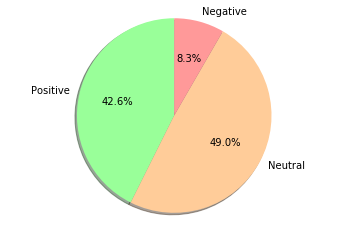

In [9]:
# Data to plot
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['#99ff99', '#ffcc99', '#ff9999']
explode = (0, 0, 0)  # explode 1st slice

# Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
result_data = pd.read_csv('result/result_sentiment_tweet.csv',encoding = 'utf-8-sig')
result_data.head()

Tweet Created At                 User Name  \
0  2019-11-16 09:47:37      RIP Joe Keery’s Hair   
1  2019-11-16 09:45:03      RIP Joe Keery’s Hair   
2  2019-11-16 09:22:44            Steve Beckwith   
3  2019-11-16 09:20:53  Tommy Wiseau Fan Account   
4  2019-11-16 09:18:54               DEPLORABLES   

                                                Text Sentiment  
0  Anyways I freakin lived #DoctorSleep and thoug...  POSITIVE  
1  *Jacob Tremblay comes on screen in #DoctorSlee...   NEUTRAL  
2  RT @FilmNewsWeb: https://t.co/udSaRa5KVd Win D...   NEUTRAL  
3  Day 311 of #365movieschallenge, watched #Docto...  POSITIVE  
4  RT @jeremywaltzer: Have you ever had a urge to...   NEUTRAL